In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import shapiro as sh
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
data = pd.read_csv('all_data.csv')

## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [3]:
shapiro_test_dep = sh(data.dep_delay)
shapiro_test_dep
#failed to reject shapiro test

C:\Users\kevin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=nan, pvalue=1.0)

<AxesSubplot:xlabel='dep_delay', ylabel='Count'>

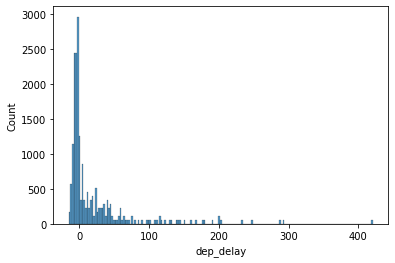

In [4]:
sns.histplot(data = data, x='dep_delay', log_scale = False)

In [5]:
shapiro_test_arr = sh(data.arr_delay)
shapiro_test_arr

C:\Users\kevin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=nan, pvalue=1.0)

<AxesSubplot:xlabel='arr_delay', ylabel='Count'>

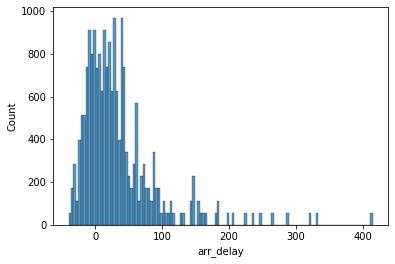

In [6]:
sns.histplot(data = data, x='arr_delay')

<AxesSubplot:xlabel='weather_delay', ylabel='Count'>

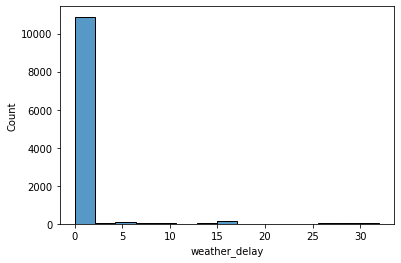

In [7]:
sns.histplot(data = data, x='weather_delay')

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [8]:
from datetime import datetime

In [9]:
flights_rand = pd.read_csv('flights_rand.csv')
flights_rand['fl_date'] = pd.to_datetime(flights_rand['fl_date'], errors='coerce')

In [10]:
flights_rand['month'] = flights_rand['fl_date'].dt.month

In [11]:
flights_rand['year'] = flights_rand['fl_date'].dt.year

In [12]:
yr_mon_dep_delay = flights_rand[['year','month', 'dep_delay']]

In [262]:
month_dep_delay = yr_mon_dep_delay[['dep_delay', 'month']].groupby('month').mean().reset_index()
month_dep_delay

,month,dep_delay
0,1,8.208605
1,2,14.773963
2,3,13.774275
3,4,6.770511
4,5,9.413636
5,6,12.374702
6,7,11.014428
7,8,13.638030
8,9,3.923773
9,10,8.522673


In [263]:
yr_dep_delay = yr_mon_dep_delay[['dep_delay', 'year']].groupby('year').mean().reset_index()
yr_dep_delay

,year,dep_delay
0,2018,9.415122
1,2019,10.774853


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [308]:
cities = flights_rand[['dest_city_name', 'fl_date']]

In [309]:
cities['country'] = 'US'

<ipython-input-309-4fa885e34e2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities['country'] = 'US'


In [325]:
cities['fl_date'] = pd.to_datetime(cities['fl_date'])

<ipython-input-325-88b608265d67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities['fl_date'] = pd.to_datetime(cities['fl_date'])


In [334]:
cities['unix_time'] = 'insert'

<ipython-input-334-874f612b17bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities['unix_time'] = 'insert'


In [336]:
cities

,dest_city_name,fl_date,country,unix_time
0,"Idaho Falls, ID",2018-07-27,US,insert
1,"El Paso, TX",2018-10-08,US,insert
2,"Detroit, MI",2018-10-31,US,insert
3,"Charlotte, NC",2019-10-15,US,insert
4,"Austin, TX",2018-06-19,US,insert
...,...,...,...,...
9995,"Midland/Odessa, TX",2019-01-12,US,insert
9996,"Los Angeles, CA",2018-11-02,US,insert
9997,"Indianapolis, IN",2019-05-20,US,insert
9998,"Nashville, TN",2019-08-04,US,insert


In [361]:
cities['unix_time'] = cities['fl_date'].astype('string').apply(lambda x: int(time.mktime(dt.datetime.strptime(x, "%Y-%m-%d").timetuple())))

<ipython-input-361-c1dbc247abee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities['unix_time'] = cities['fl_date'].astype('string').apply(lambda x: int(time.mktime(dt.datetime.strptime(x, "%Y-%m-%d").timetuple())))


In [362]:
cities

,dest_city_name,fl_date,country,unix_time
0,"Idaho Falls, ID",2018-07-27,US,1532664000
1,"El Paso, TX",2018-10-08,US,1538971200
2,"Detroit, MI",2018-10-31,US,1540958400
3,"Charlotte, NC",2019-10-15,US,1571112000
4,"Austin, TX",2018-06-19,US,1529380800
...,...,...,...,...
9995,"Midland/Odessa, TX",2019-01-12,US,1547269200
9996,"Los Angeles, CA",2018-11-02,US,1541131200
9997,"Indianapolis, IN",2019-05-20,US,1558324800
9998,"Nashville, TN",2019-08-04,US,1564891200


In [330]:
import os
import requests as re
import time
from datetime import datetime
e_k = '2acca6e1382a5713ed85ba759bea2b07'

In [346]:
def get_weather(city_name, time):
    url = str("http://history.openweathermap.org/data/2.5/history/city?q="+city_name+"&type=day&start="+str(time)+"&appid=" +e_k)
    print(url)
    res = re.get(url)
    return res.json()

In [365]:
get_weather("Idaho Falls,US", 1532664000)

http://history.openweathermap.org/data/2.5/history/city?q=Idaho Falls,US&type=day&start=1532664000&appid=2acca6e1382a5713ed85ba759bea2b07


{'code': 400000, 'message': 'data is available only in the last year'}

In [360]:
datetime.fromtimestamp(1617580800.1)

datetime.datetime(2021, 4, 4, 20, 0, 0, 100000)

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [15]:
flights_rand['total_taxi'] = flights_rand['taxi_out']+flights_rand['taxi_in']

<AxesSubplot:xlabel='total_taxi', ylabel='dep_delay'>

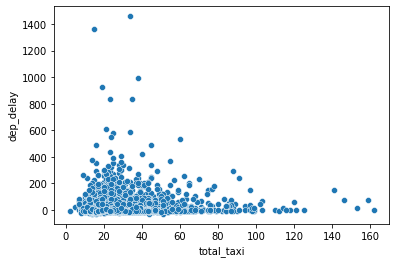

In [16]:
sns.scatterplot(data=flights_rand, x=flights_rand['total_taxi'], y=flights_rand['dep_delay'])

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [17]:
total_delay = flights_rand['arr_delay'] + flights_rand['dep_delay']

In [18]:
print('total delays from arrival delay is: ' + str(flights_rand['arr_delay'].sum()/total_delay.sum() * 100) + '%')

total delays from arrival delay is: 33.856580555891405%


#### **Task 6**: How many states cover 50% of US air traffic? 

In [19]:
destinations = flights_rand['dest_city_name'].str.rsplit(",", n=1, expand=True)

In [20]:
states = destinations.loc[:,1]

In [123]:
states.value_counts().head(5)

 CA    1118
 TX     991
 FL     759
 IL     600
 GA     566
Name: 1, dtype: int64

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [22]:
from scipy import stats

In [23]:
air_time = flights_rand['air_time']

In [24]:
dep_delay = flights_rand['dep_delay']

<AxesSubplot:xlabel='dep_delay', ylabel='air_time'>

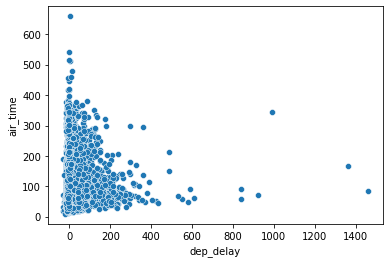

In [25]:
sns.scatterplot(data=flights_rand, x=dep_delay, y=air_time)

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [70]:
flights_rand['hour_departure'] = flights_rand['dep_time'].apply(
    lambda x: str(x)[:2] if len(str(x)) == 6 else (str(x)[:1]))

In [72]:
long = flights_rand[flights_rand['air_time'].between(400, 659)]

In [73]:
medium = flights_rand[flights_rand['air_time'].between(200,399)]

In [74]:
short = flights_rand[flights_rand['air_time'].between(0,199)]

In [82]:
commonhr_long = long.groupby('hour_departure').size().sort_values(ascending = False)
commonhr_long

hour_departure
16    3
9     2
19    2
10    2
7     1
15    1
dtype: int64

In [85]:
commonhr_medium = medium.groupby('hour_departure').size().sort_values(ascending = False)
commonhr_medium.head()

hour_departure
7     81
8     78
6     71
17    68
18    64
dtype: int64

In [86]:
commonhr_short = short.groupby('hour_departure').size().sort_values(ascending = False)
commonhr_short.head()

hour_departure
17    580
12    579
6     570
11    551
15    536
dtype: int64

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [114]:
busiest_air = flights_rand.groupby('dest').size().sort_values(ascending = False)
busiest_air

dest
ATL    529
ORD    485
DFW    392
DEN    340
LAX    314
      ... 
BTM      1
BRW      1
BQK      1
BPT      1
LBF      1
Length: 309, dtype: int64

In [107]:
passenger_rand = pd.read_csv('passenger_rand.csv')

In [108]:
pass_numb_dest = passenger_rand[['passengers', 'dest']].groupby('dest').sum().reset_index()

In [112]:
pass_numb_dest.sort_values(by = 'passengers', ascending = False)

,dest,passengers
46,ATL,1178279.0
410,LAX,783884.0
540,ORD,764232.0
186,DEN,758319.0
187,DFW,708191.0
...,...,...
736,TKE,0.0
735,TIQ,0.0
503,MVW,0.0
733,TEX,0.0


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [115]:
fuel = pd.read_csv('fuel.csv')

In [379]:
monthly_carrier_delay = flights_rand[['mkt_unique_carrier', 'dep_delay', 'month']].groupby(['mkt_unique_carrier', 'month']).agg({'dep_delay': 'mean'})

In [380]:
monthly_carrier_dist = flights_rand[['mkt_unique_carrier', 'distance', 'month']].groupby(['mkt_unique_carrier', 'month']).sum()

In [381]:
numb_pass_carrier = passenger_rand[['passengers', 'unique_carrier']].groupby('unique_carrier').sum().sort_values(by = 'passengers', ascending = False)

In [382]:
fuel_carrier = fuel[['total_cost', 'unique_carrier']].groupby('unique_carrier').sum().sort_values(by = 'total_cost', ascending = False)

In [375]:
merged_delay = pd.merge(monthly_carrier_delay, monthly_carrier_dist, how = 'left', on = ['mkt_unique_carrier', 'month']).reset_index()

In [205]:
merged_delay_renamed = merged_delay.rename(columns={"mkt_unique_carrier": "unique_carrier"})

In [376]:
carrier_merged = pd.merge(numb_pass_carrier, fuel_carrier, how = 'left', on = 'unique_carrier').reset_index()

In [377]:
fuel_pass = pd.merge(merged_delay_renamed, carrier_merged, how = 'right', on = 'unique_carrier')

In [378]:
fuel_pass.sort_values(by = 'total_cost', ascending = False)

,unique_carrier,month,dep_delay,distance,passengers,total_cost
42,DL,7.0,11.091324,164205.0,3102969.0,3.286616e+10
36,DL,1.0,10.620915,106087.0,3102969.0,3.286616e+10
47,DL,12.0,8.201005,145169.0,3102969.0,3.286616e+10
46,DL,11.0,11.502959,114207.0,3102969.0,3.286616e+10
45,DL,10.0,4.603896,107554.0,3102969.0,3.286616e+10
...,...,...,...,...,...,...
379,O6,NaN,NaN,NaN,0.0,NaN
380,6R,NaN,NaN,NaN,0.0,NaN
381,1TQ,NaN,NaN,NaN,0.0,NaN
384,VIQ,NaN,NaN,NaN,0.0,NaN


Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [373]:
avg_fuel = (fuel_pass.groupby(['unique_carrier', 'month']).agg(np.mean).reset_index().fillna(0).assign(
    
    cost_per_km = lambda x: x['total_cost'] / x['distance']
    ).assign(
    
    cost_per_passenger = lambda x: x[('total_cost')] / x['passengers']
    )
).fillna(0)
#.sort_values(by = 'cost_per_passenger', ascending = False)
avg_fuel

,unique_carrier,month,dep_delay,distance,passengers,total_cost,cost_per_km,cost_per_passenger
0,AA,1.0,13.058537,155274.0,2950254.0,2.853022e+10,183741.104860,9670.427128
1,AA,2.0,10.502959,118701.0,2950254.0,2.853022e+10,240353.630686,9670.427128
2,AA,3.0,8.406780,126485.0,2950254.0,2.853022e+10,225562.053334,9670.427128
3,AA,4.0,7.514851,141122.0,2950254.0,2.853022e+10,202167.035019,9670.427128
4,AA,5.0,10.160643,161679.0,2950254.0,2.853022e+10,176462.102784,9670.427128
...,...,...,...,...,...,...,...,...
118,WN,8.0,10.738255,118317.0,3794549.0,1.816020e+10,153487.644506,4785.864574
119,WN,9.0,2.403361,83061.0,3794549.0,1.816020e+10,218636.876934,4785.864574
120,WN,10.0,10.167785,108434.0,3794549.0,1.816020e+10,167476.968801,4785.864574
121,WN,11.0,10.007812,94190.0,3794549.0,1.816020e+10,192803.881888,4785.864574


<AxesSubplot:xlabel='dep_delay', ylabel='cost_per_passenger'>

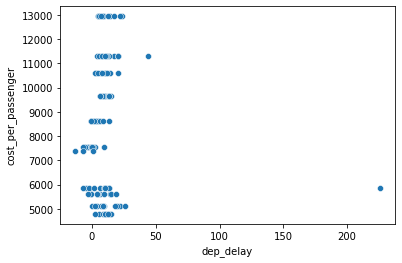

In [260]:
sns.scatterplot(data = avg_fuel, x = 'dep_delay', y = 'cost_per_passenger')

<AxesSubplot:xlabel='dep_delay', ylabel='cost_per_km'>

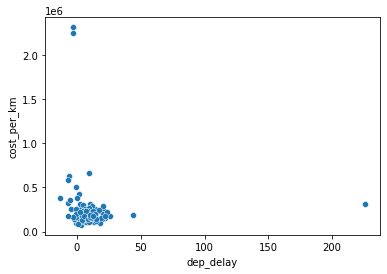

In [261]:
sns.scatterplot(data = avg_fuel, x = 'dep_delay', y = 'cost_per_km')

In [245]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

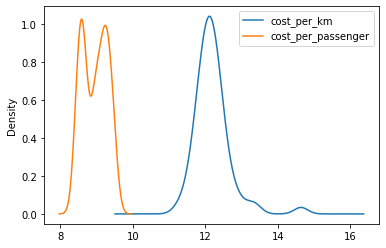

In [255]:
avg_fuel_cost = np.log1p(avg_fuel[['cost_per_km', 'cost_per_passenger']])
avg_fuel_cost.plot.kde()

## avg delay per airport

### arr_delay and taxi out/in correlation

In [4]:
flights = pd.read_csv('flights_big.csv')

<AxesSubplot:xlabel='arr_delay', ylabel='taxi_out'>

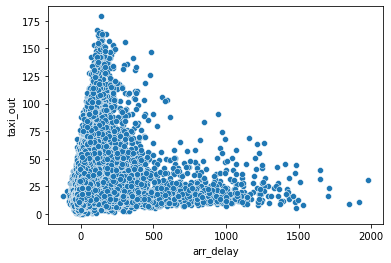

In [5]:
sns.scatterplot(data = flights, x = 'arr_delay', y = 'taxi_out')

<AxesSubplot:xlabel='taxi_in', ylabel='arr_delay'>

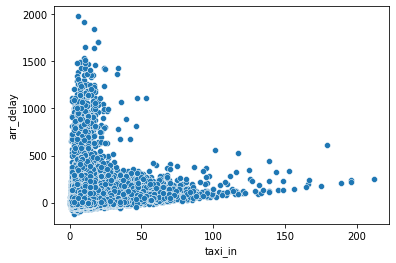

In [6]:
sns.scatterplot(data = flights, x = 'taxi_in', y = 'arr_delay')

<AxesSubplot:xlabel='cancelled', ylabel='arr_delay'>

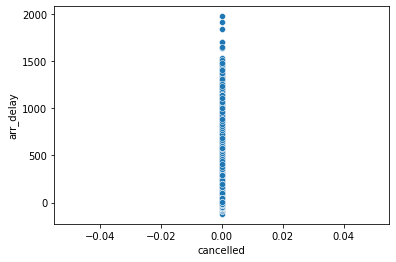

In [7]:
sns.scatterplot(data = flights, x = 'cancelled', y = 'arr_delay')

<AxesSubplot:xlabel='diverted', ylabel='arr_delay'>

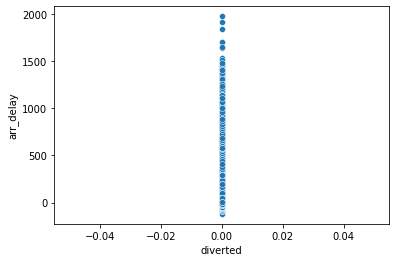

In [7]:
sns.scatterplot(data = flights, x = 'diverted', y = 'arr_delay')

### wheels off and on

In [8]:
flights['hour_wheels_on'] = flights['wheels_on'].apply(
    lambda x: str(x)[:2] if len(str(x)) == 6 else (str(x)[:1]))

In [9]:
flights['hour_wheels_off'] = flights['wheels_off'].apply(
    lambda x: str(x)[:2] if len(str(x)) == 6 else (str(x)[:1]))

In [10]:
flights['hour_wheels_off']

0         16
1         19
2         12
3         21
4         20
          ..
499995    20
499996    21
499997    19
499998    10
499999    15
Name: hour_wheels_off, Length: 500000, dtype: object

<AxesSubplot:xlabel='hour_wheels_on', ylabel='arr_delay'>

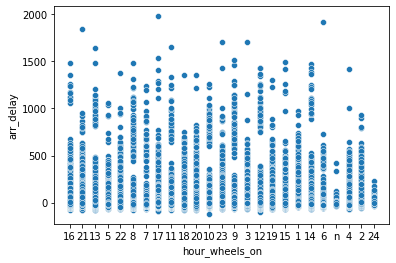

In [10]:
sns.scatterplot(data = flights, x = 'hour_wheels_on', y = 'arr_delay')

<AxesSubplot:xlabel='hour_wheels_off', ylabel='arr_delay'>

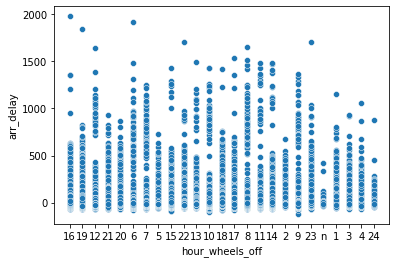

In [11]:
sns.scatterplot(data = flights, x = 'hour_wheels_off', y = 'arr_delay')